In [2]:
#Let's finally begin using our cleaned data to find some insight on the NBA's Defensive Player of the Year award. We'll start by importing the necessary libraries and reading in our data.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

In [3]:
# Read in the data
cleaned_data = pd.read_csv('/Users/david/Documents/Python Projects/DPOY/Cleaned/completed.csv')
del cleaned_data['Unnamed: 0']
cleaned_data.head(15)

,Rank,Player,Share,Year,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,poss,raptor_defense,raptor_total,war_total,war_reg_season,predator_defense,predator_total,pace_impact
0,1,Dennis Rodman,0.531,1991,SF,29,DET,82,77,33.5,3.4,6.8,0.493,0.1,0.4,0.200,3.3,6.5,0.509,0.498,1.4,2.1,0.631,4.4,8.1,12.5,1.0,0.8,0.7,1.1,3.4,8.2,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,6262.0,2.135429,3.041283,9.590154,8.173712,2.282986,2.935528,-0.314597
1,4,Joe Dumars,0.031,1991,SG,27,DET,80,80,38.1,7.8,16.2,0.481,0.2,0.6,0.311,7.6,15.6,0.488,0.487,4.6,5.2,0.890,0.8,1.6,2.3,5.5,1.1,0.1,2.4,1.7,20.4,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,7018.0,-0.228319,2.905636,10.494255,8.240432,-0.168459,2.733955,-0.646390
2,0,Mark Aguirre,0.000,1991,SF,31,DET,78,13,25.7,5.4,11.7,0.462,0.3,1.0,0.308,5.1,10.7,0.477,0.475,3.1,4.1,0.757,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,4640.0,0.125307,1.380046,5.133206,3.634220,-0.091098,1.161691,0.242006
3,0,William Bedford,0.000,1991,C,27,DET,60,4,9.4,1.8,4.0,0.438,0.1,0.2,0.385,1.7,3.8,0.441,0.448,0.9,1.3,0.705,0.9,1.3,2.2,0.5,0.0,0.6,0.5,1.3,4.5,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,1212.0,0.645739,-2.084771,0.210623,0.241968,-0.421886,-3.023299,0.134107
4,0,Lance Blanks,0.000,1991,SG,24,DET,38,0,5.6,0.7,1.6,0.426,0.1,0.4,0.125,0.6,1.2,0.533,0.443,0.3,0.4,0.714,0.1,0.4,0.5,0.7,0.2,0.1,0.5,0.9,1.7,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,414.0,-0.189945,-2.733352,0.001851,0.001851,-0.545310,-3.203495,1.818287
5,0,James Edwards,0.000,1991,C,35,DET,72,70,26.4,5.3,11.0,0.484,0.0,0.0,0.500,5.3,11.0,0.484,0.484,3.0,4.1,0.729,1.3,2.6,3.8,0.9,0.2,0.4,1.8,3.5,13.6,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,4341.0,-0.612151,-4.021622,-1.505460,-0.589720,-0.659752,-3.732156,0.482833
6,0,Scott Hastings,0.000,1991,PF,30,DET,27,0,4.2,0.6,1.0,0.571,0.1,0.1,0.750,0.5,0.9,0.542,0.625,0.5,0.5,1.000,0.5,0.5,1.0,0.3,0.0,0.0,0.3,0.9,1.8,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,286.0,-2.509244,-0.219721,0.193023,0.155897,-2.533604,-1.115314,0.483458
7,0,Gerald Henderson,0.000,1991,PG,35,DET,23,10,17.0,2.2,5.1,0.427,0.3,0.9,0.333,1.9,4.2,0.448,0.457,0.7,0.9,0.762,0.3,1.3,1.6,2.7,0.5,0.1,1.2,1.9,5.3,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,835.0,-0.566628,-2.358394,0.084181,0.132964,-0.753982,-2.660047,0.451791
8,0,Vinnie Johnson,0.000,1991,SG,34,DET,82,28,29.1,5.0,11.4,0.434,0.1,0.4,0.324,4.8,11.0,0.438,0.440,1.6,2.5,0.646,1.3,2.1,3.4,3.3,0.9,0.2,1.4,2.0,11.7,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,5461.0,0.169378,0.114801,4.166981,2.934910,0.063502,0.005727,-0.299995
9,0,Bill Laimbeer,0.000,1991,C,33,DET,82,81,32.5,4.5,9.5,0.478,0.5,1.5,0.296,4.1,8.0,0.513,0.502,1.5,1.8,0.837,2.1,6.9,9.0,1.9,0.5,0.7,1.2,3.0,11.0,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,6016.0,1.971985,1.464927,6.701946,5.973092,1.785419,1.506569,-0.180773


In [4]:
#Show the rows that have null values
cleaned_data[cleaned_data.isnull().any(axis=1)]

,Rank,Player,Share,Year,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,poss,raptor_defense,raptor_total,war_total,war_reg_season,predator_defense,predator_total,pace_impact
890,0,Jeff Sheppard,0.0,1999,SG,24,ATL,18,5,10.3,0.8,2.2,0.385,0.1,0.4,0.286,0.7,1.8,0.406,0.410,0.4,0.7,0.615,0.3,0.9,1.2,0.9,0.2,0.0,0.4,0.7,2.2,Atlanta Hawks,31,19,0.620,2.0,86.3,83.4,2.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1144,0,Kiwane Lemorris Garris,0.0,2000,SG,25,ORL,3,0,7.7,0.7,3.3,0.200,0.0,0.3,0.000,0.7,3.0,0.222,0.200,0.0,0.0,0.000,0.0,0.3,0.3,0.7,0.0,0.0,0.3,0.0,1.3,Orlando Magic,41,41,0.500,11.0,100.1,99.4,0.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1428,0,Efthimios Rentzias,0.0,2003,C,27,PHI,35,0,4.1,0.6,1.7,0.339,0.1,0.2,0.500,0.5,1.5,0.314,0.373,0.2,0.3,0.889,0.3,0.5,0.7,0.2,0.2,0.1,0.1,0.6,1.5,Philadelphia 76ers,48,34,0.585,1.0,96.8,94.5,1.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1879,0,DJ Mbenga,0.0,2005,C,24,DAL,15,1,3.9,0.4,0.9,0.429,0.0,0.0,0.000,0.4,0.9,0.429,0.429,0.2,0.3,0.750,0.2,0.3,0.5,0.0,0.0,0.3,0.3,0.9,1.0,Dallas Mavericks,58,24,0.707,1.0,102.5,96.8,5.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2384,0,DJ Mbenga,0.0,2007,C,26,DAL,21,0,3.8,0.2,0.8,0.313,0.0,0.0,0.000,0.2,0.8,0.313,0.313,0.3,0.4,0.875,0.1,0.4,0.5,0.3,0.1,0.2,0.2,0.8,0.8,Dallas Mavericks,67,15,0.817,—,100.0,92.8,7.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13462,0,Mitch Creek,0.0,2019,SF,26,MIN,5,0,9.6,1.6,3.2,0.500,0.0,0.4,0.000,1.6,2.8,0.571,0.500,1.0,1.4,0.714,1.2,1.2,2.4,1.2,0.4,0.0,0.2,0.6,4.2,Minnesota Timberwolves,36,46,0.439,18.0,112.5,114.0,-1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13793,0,Charlie Brown,0.0,2020,SG,22,ATL,10,0,4.0,0.6,1.9,0.316,0.3,0.9,0.333,0.3,1.0,0.300,0.395,0.5,0.5,1.000,0.2,0.2,0.4,0.2,0.2,0.2,0.3,0.3,2.0,Atlanta Hawks,20,47,0.299,21.0,111.8,119.7,-7.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13882,0,Nic Claxton,0.0,2021,C,21,BRK,32,1,18.6,2.8,4.5,0.621,0.0,0.2,0.200,2.8,4.4,0.636,0.624,1.0,2.0,0.484,1.3,3.8,5.2,0.9,0.7,1.3,0.6,2.1,6.6,Brooklyn Nets,48,24,0.667,1.0,118.6,114.1,4.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13976,0,Enes Freedom,0.0,2021,C,28,POR,72,35,24.4,4.7,7.8,0.604,0.0,0.1,0.250,4.7,7.7,0.607,0.605,1.8,2.3,0.774,3.9,7.1,11.0,1.2,0.5,0.7,1.1,2.3,11.2,Portland Trail Blazers,42,30,0.583,10.0,116.1,114.3,1.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Let's make a copy of the data so we can work with it without worrying about messing up the original.
training_data = cleaned_data[cleaned_data["Year"]<2022].copy()
testing_data = cleaned_data[cleaned_data["Year"]>=2022].copy()
training_data.tail()

,Rank,Player,Share,Year,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,poss,raptor_defense,raptor_total,war_total,war_reg_season,predator_defense,predator_total,pace_impact
14252,0,Tristan Thompson,0.0,2021,PF,29,BOS,54,43,23.8,3.1,6.0,0.518,0.0,0.1,0.000,3.1,6.0,0.523,0.518,1.3,2.2,0.592,3.1,5.0,8.1,1.2,0.4,0.6,1.1,2.2,7.6,Boston Celtics,36,36,0.5,13.0,112.6,111.2,1.32,2936.0,-0.619323,-2.653818,0.061555,0.178767,-0.098552,-2.210535,-0.383326
14253,0,Kemba Walker,0.0,2021,PG,30,BOS,43,43,31.8,6.6,15.7,0.420,3.0,8.2,0.360,3.7,7.5,0.486,0.514,3.1,3.5,0.899,0.4,3.6,4.0,4.9,1.1,0.3,2.0,1.4,19.3,Boston Celtics,36,36,0.5,13.0,112.6,111.2,1.32,3023.0,0.226865,3.064121,4.309680,4.664962,0.740362,3.937722,0.045730
14254,0,Tremont Waters,0.0,2021,PG,23,BOS,26,3,9.2,1.3,3.2,0.405,0.6,1.5,0.395,0.7,1.8,0.413,0.494,0.6,0.7,0.941,0.2,0.6,0.8,2.4,0.6,0.0,1.0,0.7,3.8,Boston Celtics,36,36,0.5,13.0,112.6,111.2,1.32,527.0,-2.560077,-1.666718,0.145040,0.197674,-3.491175,-2.418706,2.251333
14255,0,Grant Williams,0.0,2021,PF,22,BOS,63,9,18.1,1.7,3.9,0.437,0.8,2.0,0.372,1.0,1.9,0.508,0.534,0.5,0.8,0.588,0.8,2.1,2.8,1.0,0.5,0.4,0.9,2.6,4.7,Boston Celtics,36,36,0.5,13.0,112.6,111.2,1.32,2514.0,0.147463,-2.801170,-0.020971,-0.361109,0.258954,-2.505400,0.222802
14256,0,Robert Williams,0.0,2021,C,23,BOS,52,13,18.9,3.6,5.0,0.721,0.0,0.0,0.000,3.6,4.9,0.727,0.721,0.9,1.4,0.616,2.6,4.3,6.9,1.8,0.8,1.8,1.0,2.0,8.0,Boston Celtics,36,36,0.5,13.0,112.6,111.2,1.32,2146.0,0.264096,1.092369,2.032606,1.678234,0.422672,0.661212,-0.057383


In [6]:
#Let's look at "Share" in descending order to see who the top 10 players are in terms of DPOY voting.
training_data.sort_values(by='Share', ascending=False).head(10)

,Rank,Player,Share,Year,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,poss,raptor_defense,raptor_total,war_total,war_reg_season,predator_defense,predator_total,pace_impact
3158,1,Dwight Howard,0.975,2011,C,25,ORL,78,78,37.6,7.9,13.4,0.593,0.0,0.1,0.000,7.9,13.3,0.597,0.593,7.0,11.7,0.596,4.0,10.1,14.1,1.4,1.4,2.4,3.6,3.3,22.9,Orlando Magic,52,30,0.634,6.0,99.2,93.7,4.92,6112.0,5.117279,6.177285,14.558603,13.643897,4.831580,6.220994,0.016591
1287,1,Ben Wallace,0.967,2002,C,27,DET,80,80,36.5,3.2,6.0,0.531,0.0,0.0,0.000,3.2,6.0,0.535,0.531,1.2,2.9,0.423,4.0,9.0,13.0,1.4,1.7,3.5,0.9,2.2,7.6,Detroit Pistons,50,32,0.610,—,94.3,92.2,1.69,6283.0,5.810173,5.116958,13.279455,11.489469,5.794562,5.337962,-0.970622
2915,1,Dwight Howard,0.944,2010,C,24,ORL,82,82,34.7,6.2,10.2,0.612,0.0,0.1,0.000,6.2,10.1,0.617,0.612,5.9,10.0,0.592,3.5,9.7,13.2,1.8,0.9,2.8,3.3,3.5,18.3,Orlando Magic,59,23,0.720,—,102.8,95.3,7.12,6418.0,5.033301,5.887460,14.800617,12.547230,4.623494,5.826628,0.085674
5147,1,Rudy Gobert,0.928,2021,C,28,UTA,71,71,30.8,5.5,8.2,0.675,0.0,0.1,0.000,5.5,8.1,0.680,0.675,3.3,5.3,0.623,3.4,10.1,13.5,1.3,0.6,2.7,1.7,2.3,14.3,Utah Jazz,52,20,0.722,—,116.4,107.2,8.97,5381.0,7.907439,7.786727,13.837745,12.363531,7.459246,7.632243,0.268093
4593,1,Rudy Gobert,0.923,2018,C,25,UTA,56,56,32.4,4.9,7.9,0.622,0.0,0.0,0.000,4.9,7.9,0.622,0.622,3.6,5.3,0.682,2.9,7.8,10.7,1.4,0.8,2.3,1.9,2.7,13.5,Utah Jazz,48,34,0.585,1.0,104.1,99.8,4.47,4486.0,4.197939,3.616404,7.210860,5.590855,4.907396,4.439847,0.273740
2677,1,Dwight Howard,0.911,2009,C,23,ORL,79,79,35.7,7.1,12.4,0.572,0.0,0.0,0.000,7.1,12.4,0.573,0.572,6.4,10.7,0.594,4.3,9.6,13.8,1.4,1.0,2.9,3.0,3.4,20.6,Orlando Magic,59,23,0.720,—,101.0,94.4,6.48,7184.0,4.375458,5.101136,15.014427,11.017021,4.179789,5.179106,-0.205376
1350,1,Ben Wallace,0.908,2003,C,28,DET,73,73,39.4,2.9,6.0,0.481,0.0,0.1,0.167,2.9,5.9,0.485,0.482,1.2,2.6,0.450,4.0,11.4,15.4,1.6,1.4,3.2,1.2,2.5,6.9,Detroit Pistons,50,32,0.610,—,91.4,87.7,2.97,6571.0,6.944065,5.581309,15.259763,11.031349,6.891315,5.927876,-0.941956
3828,1,Joakim Noah,0.888,2014,C,28,CHI,80,80,35.3,4.8,10.0,0.475,0.0,0.0,0.000,4.8,10.0,0.476,0.475,3.1,4.2,0.737,3.5,7.7,11.3,5.4,1.2,1.5,2.4,3.1,12.6,Chicago Bulls,48,34,0.585,8.0,93.7,91.8,1.20,5720.0,4.533858,5.718149,13.045815,12.461590,4.824594,5.732738,-0.335474
4467,1,Draymond Green,0.868,2017,PF,26,GSW,76,76,32.5,3.6,8.6,0.418,1.1,3.5,0.308,2.5,5.1,0.494,0.481,2.0,2.8,0.709,1.3,6.6,7.9,7.0,2.0,1.4,2.4,2.9,10.2,Golden State Warriors,67,15,0.817,—,115.9,104.3,11.35,6520.0,6.364778,7.768285,16.830096,12.892269,6.821319,9.267512,1.597643
4968,1,Giannis Antetokounmpo,0.864,2020,PF,25,MIL,63,63,30.4,10.9,19.7,0.553,1.4,4.7,0.304,9.5,15.0,0.631,0.589,6.3,10.0,0.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,Milwaukee Bucks,56,17,0.767,—,118.7,108.6,9.41,4894.0,3.439668,8.778267,13.149613,12.031285,2.676433,7.521699,1.799512


In [7]:
#Let's remove any rows that have any null values.
training_data = training_data.dropna()

In [8]:
#Cleaning up and getting rid of outliers
#Might come back to this later and see if having the Share column be greater than 0.0 will affect the accuracy of the model.

#training_data = training_data[training_data['Share'] > 0.0]
#No DPOY has ever won the award with less than 1000 possesions, so let's remove any rows that have less than 1000 possesions.
#training_data = training_data[training_data['poss'] > 1000]

training_data.head(20)


,Rank,Player,Share,Year,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,poss,raptor_defense,raptor_total,war_total,war_reg_season,predator_defense,predator_total,pace_impact
0,1,Dennis Rodman,0.531,1991,SF,29,DET,82,77,33.5,3.4,6.8,0.493,0.1,0.4,0.200,3.3,6.5,0.509,0.498,1.4,2.1,0.631,4.4,8.1,12.5,1.0,0.8,0.7,1.1,3.4,8.2,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,6262.0,2.135429,3.041283,9.590154,8.173712,2.282986,2.935528,-0.314597
1,4,Joe Dumars,0.031,1991,SG,27,DET,80,80,38.1,7.8,16.2,0.481,0.2,0.6,0.311,7.6,15.6,0.488,0.487,4.6,5.2,0.890,0.8,1.6,2.3,5.5,1.1,0.1,2.4,1.7,20.4,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,7018.0,-0.228319,2.905636,10.494255,8.240432,-0.168459,2.733955,-0.646390
2,0,Mark Aguirre,0.000,1991,SF,31,DET,78,13,25.7,5.4,11.7,0.462,0.3,1.0,0.308,5.1,10.7,0.477,0.475,3.1,4.1,0.757,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,4640.0,0.125307,1.380046,5.133206,3.634220,-0.091098,1.161691,0.242006
3,0,William Bedford,0.000,1991,C,27,DET,60,4,9.4,1.8,4.0,0.438,0.1,0.2,0.385,1.7,3.8,0.441,0.448,0.9,1.3,0.705,0.9,1.3,2.2,0.5,0.0,0.6,0.5,1.3,4.5,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,1212.0,0.645739,-2.084771,0.210623,0.241968,-0.421886,-3.023299,0.134107
4,0,Lance Blanks,0.000,1991,SG,24,DET,38,0,5.6,0.7,1.6,0.426,0.1,0.4,0.125,0.6,1.2,0.533,0.443,0.3,0.4,0.714,0.1,0.4,0.5,0.7,0.2,0.1,0.5,0.9,1.7,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,414.0,-0.189945,-2.733352,0.001851,0.001851,-0.545310,-3.203495,1.818287
5,0,James Edwards,0.000,1991,C,35,DET,72,70,26.4,5.3,11.0,0.484,0.0,0.0,0.500,5.3,11.0,0.484,0.484,3.0,4.1,0.729,1.3,2.6,3.8,0.9,0.2,0.4,1.8,3.5,13.6,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,4341.0,-0.612151,-4.021622,-1.505460,-0.589720,-0.659752,-3.732156,0.482833
6,0,Scott Hastings,0.000,1991,PF,30,DET,27,0,4.2,0.6,1.0,0.571,0.1,0.1,0.750,0.5,0.9,0.542,0.625,0.5,0.5,1.000,0.5,0.5,1.0,0.3,0.0,0.0,0.3,0.9,1.8,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,286.0,-2.509244,-0.219721,0.193023,0.155897,-2.533604,-1.115314,0.483458
7,0,Gerald Henderson,0.000,1991,PG,35,DET,23,10,17.0,2.2,5.1,0.427,0.3,0.9,0.333,1.9,4.2,0.448,0.457,0.7,0.9,0.762,0.3,1.3,1.6,2.7,0.5,0.1,1.2,1.9,5.3,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,835.0,-0.566628,-2.358394,0.084181,0.132964,-0.753982,-2.660047,0.451791
8,0,Vinnie Johnson,0.000,1991,SG,34,DET,82,28,29.1,5.0,11.4,0.434,0.1,0.4,0.324,4.8,11.0,0.438,0.440,1.6,2.5,0.646,1.3,2.1,3.4,3.3,0.9,0.2,1.4,2.0,11.7,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,5461.0,0.169378,0.114801,4.166981,2.934910,0.063502,0.005727,-0.299995
9,0,Bill Laimbeer,0.000,1991,C,33,DET,82,81,32.5,4.5,9.5,0.478,0.5,1.5,0.296,4.1,8.0,0.513,0.502,1.5,1.8,0.837,2.1,6.9,9.0,1.9,0.5,0.7,1.2,3.0,11.0,Detroit Pistons,50,32,0.610,11.0,100.1,96.8,3.08,6016.0,1.971985,1.464927,6.701946,5.973092,1.785419,1.506569,-0.180773


In [9]:
#Let's see who played the fewest minutes and how many games they played.
training_data.sort_values(by='poss', ascending=True).head(10)

,Rank,Player,Share,Year,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,poss,raptor_defense,raptor_total,war_total,war_reg_season,predator_defense,predator_total,pace_impact
10836,0,JamesOn Curry,0.0,2010,PG,24,LAC,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Los Angeles Clippers,29,53,0.354,28.0,95.7,102.1,-6.01,1.0,-4.250245,-10.821879,0.000000,0.000000,-6.209344,-14.137728,-1.404681
11576,0,Damion James,0.0,2013,SF,25,BRK,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,Brooklyn Nets,49,33,0.598,5.0,96.9,95.1,1.25,1.0,1.057768,-3.148504,0.000000,0.000000,0.941358,-4.759088,-1.378120
1960,0,Alex Scales,0.0,2006,SG,27,SAS,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,San Antonio Spurs,63,19,0.768,—,95.6,88.8,6.69,1.0,-1.465248,-5.122268,0.000000,0.000000,-3.965641,-9.191686,-1.511781
12740,0,Danuel House,0.0,2017,SG,23,WAS,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Washington Wizards,49,33,0.598,—,109.2,107.4,1.36,2.0,17.461880,-1.876843,0.000424,0.000424,7.380937,-10.223013,-4.633567
5095,0,JP Macura,0.0,2020,SG,24,CLE,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cleveland Cavaliers,19,46,0.292,33.0,106.9,114.8,-7.77,2.0,16.879807,19.740979,0.011004,0.011004,6.232793,4.909506,-4.190924
315,0,Chuck Nevitt,0.0,1994,C,34,SAS,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,0.5,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,San Antonio Spurs,55,27,0.671,3.0,100.0,94.8,5.05,2.0,-19.496001,-23.886342,-0.013443,-0.013443,-15.749438,-11.543183,23.732063
7373,0,Bruce Bowen,0.0,1997,SF,25,MIA,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Miami Heat,61,21,0.744,—,94.8,89.3,5.56,2.0,24.814355,18.762897,0.010258,0.010258,14.787087,7.293420,-5.965230
8377,0,Randell Jackson,0.0,2000,PF,24,DAL,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dallas Mavericks,40,42,0.488,15.0,101.4,102.0,-0.29,2.0,-4.526546,-10.665811,-0.003977,-0.003977,-6.754384,-13.819026,-1.433940
2356,0,Von Wafer,0.0,2007,SF,21,LAC,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Los Angeles Clippers,40,42,0.488,21.0,95.6,96.1,-0.07,2.0,-1.766765,-12.339105,-0.005351,-0.005351,-4.711524,-10.796237,8.720949
8699,0,Andy Panko,0.0,2001,SF,23,ATL,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta Hawks,25,57,0.305,27.0,91.0,96.2,-5.55,2.0,-1.807728,-4.881170,-0.001071,-0.001071,-4.575325,-9.397833,-1.422325


In [10]:
#Checking the datatype of each column
training_data.dtypes

Rank                 object
Player               object
Share               float64
Year                  int64
Pos                  object
Age                   int64
Tm                   object
G                     int64
GS                    int64
MP                  float64
FG                  float64
FGA                 float64
FG%                 float64
3P                  float64
3PA                 float64
3P%                 float64
2P                  float64
2PA                 float64
2P%                 float64
eFG%                float64
FT                  float64
FTA                 float64
FT%                 float64
ORB                 float64
DRB                 float64
TRB                 float64
AST                 float64
STL                 float64
BLK                 float64
TOV                 float64
PF                  float64
PTS                 float64
Team                 object
W                     int64
L                     int64
W/L%                

In [11]:
#Getting rid of all the data types that aren't numerical
training_data = training_data.select_dtypes(exclude=['object'])

In [12]:
#Checking the null values
training_data.isnull().sum()

Share               0
Year                0
Age                 0
G                   0
GS                  0
MP                  0
FG                  0
FGA                 0
FG%                 0
3P                  0
3PA                 0
3P%                 0
2P                  0
2PA                 0
2P%                 0
eFG%                0
FT                  0
FTA                 0
FT%                 0
ORB                 0
DRB                 0
TRB                 0
AST                 0
STL                 0
BLK                 0
TOV                 0
PF                  0
PTS                 0
W                   0
L                   0
W/L%                0
PS/G                0
PA/G                0
SRS                 0
poss                0
raptor_defense      0
raptor_total        0
war_total           0
war_reg_season      0
predator_defense    0
predator_total      0
pace_impact         0
dtype: int64

In [13]:
#Show the rows with null values
training_data[training_data.isnull().any(axis=1)]

,Share,Year,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W,L,W/L%,PS/G,PA/G,SRS,poss,raptor_defense,raptor_total,war_total,war_reg_season,predator_defense,predator_total,pace_impact


<AxesSubplot: >

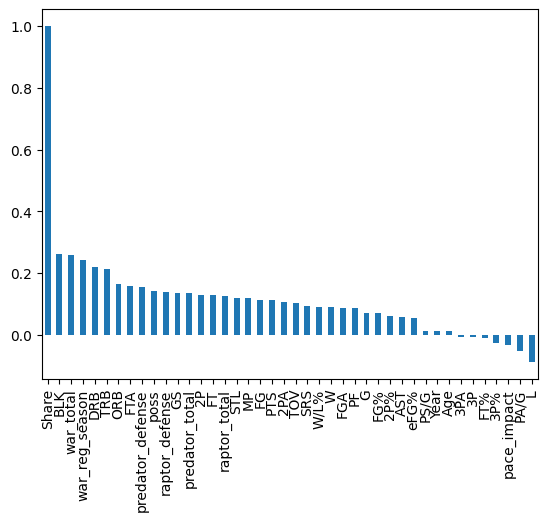

In [14]:
training_data.corr()["Share"].sort_values(ascending=False).plot.bar()

In [15]:
training_data.shape

(14030, 42)

A

In [16]:
#Setting the features and target. Will also drop columns with low correlation and then eliminating stats that don't pertain to defense.
#,"3P%","3P","3PA","AST","Age","FGA","PS/G","Year","FG"
features = training_data.drop(columns=["Share"])
target = training_data["Share"]

In [17]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=42)

In [18]:
# Define the hyperparameter grid
param_grid = {'alpha': [x / 100 for x in range(1, 1000)]}
# Instantiate the ridge model
model_rid = Ridge()
# Create a cross-validated grid search object
grid_search = GridSearchCV(model_rid, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)



Best parameters: {'alpha': 9.99}
Best score: 0.10257217789360984


In [19]:
# Instantiate the xgb model 
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [20]:
#Let's instatntiate the model again with an alpha of 9.99
model_rid = Ridge(alpha=9.99)
model_rid.fit(X_train, y_train)

Ridge(alpha=9.99)

In [21]:
# Instantiate model
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

LinearRegression()

In [22]:
# Initialize and fit the random forrest model
model_ran = RandomForestRegressor()
model_ran.fit(X_train, y_train)


RandomForestRegressor()

In [23]:
# Make predictions on the test set (xgb)
y_pred_xgb = model_xgb.predict(X_test)

In [24]:
# Make predicitons on the test set (ridge)
y_pred_rid = model_rid.predict(X_test)

In [25]:
# Make predictions on the test set (linear regression)
y_pred_lin = model_lin.predict(X_test)

In [26]:
# Make predictions on the test set (random forest)
y_pred_ran = model_ran.predict(X_test)

In [27]:
# Evaluate the model (xgb)
score = model_xgb.score(X_test, y_test)
print("Test score:", score)

Test score: 0.547796792602884


In [28]:
# Evaluate the model (ridge)
score = model_rid.score(X_test, y_test)
print("Test score:", score)

Test score: 0.1474669925292289


In [29]:
# Evaluate the linear regression model's performance
score= model_lin.score(X_test, y_test)
print("Test score:", score)

Test score: 0.14706876379899259


In [30]:
# Evaluate the random forest model's performance
score = model_ran.score(X_test, y_test)
print("Test score:", score)


Test score: 0.577701079306234


In [31]:
# Calculate the mean squared error (ridge)
mse = mean_squared_error(y_test, y_pred_rid)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse,2))

RMSE:  0.04


In [32]:
#Calculate the mean squared error (xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse,2))

RMSE:  0.03


In [33]:
#Calculate the mean squared error for the linear regression model
mse = mean_squared_error(y_test, y_pred_lin)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 2))

RMSE:  0.04


In [34]:
#Calculate the mean squared error for the random forest model
mse = mean_squared_error(y_test, y_pred_ran)
rmse = np.sqrt(mse)
print("RMSE: ", np.round(rmse, 2))

RMSE:  0.03


In [35]:
# Now let's see how the model performs on the testing data
testing_data = testing_data.dropna().copy()
# Remove players who have less than 1000 possessions played
testing_data = testing_data[testing_data['poss'] > 1000]
testing_data.head()


,Rank,Player,Share,Year,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,poss,raptor_defense,raptor_total,war_total,war_reg_season,predator_defense,predator_total,pace_impact
5291,1,Marcus Smart,0.514,2022,PG,27,BOS,71,71,32.3,4.2,10.1,0.418,1.7,5.1,0.331,2.5,5.0,0.506,0.501,2.0,2.5,0.793,0.6,3.2,3.8,5.9,1.7,0.3,2.2,2.3,12.1,Boston Celtics,51,31,0.622,—,111.8,104.5,7.02,6273.0,1.605842,2.828683,8.848569,7.100023,2.245025,3.892149,1.188979
5292,7,Robert Williams,0.016,2022,C,24,BOS,61,61,29.6,4.4,6.0,0.736,0.0,0.0,0.000,4.4,6.0,0.738,0.736,1.1,1.5,0.722,3.9,5.7,9.6,2.0,0.9,2.2,1.0,2.2,10.0,Boston Celtics,51,31,0.622,—,111.8,104.5,7.02,4458.0,3.016426,3.655650,7.213417,5.168515,2.501664,2.661483,-0.550678
5293,9,Al Horford,0.006,2022,C,35,BOS,69,69,29.1,3.9,8.2,0.467,1.3,3.8,0.336,2.6,4.4,0.582,0.546,1.2,1.4,0.842,1.6,6.1,7.7,3.4,0.7,1.3,0.9,1.9,10.2,Boston Celtics,51,31,0.622,—,111.8,104.5,7.02,5728.0,3.734354,4.320840,10.214641,6.599301,3.753473,4.338402,-0.750163
5294,0,Jaylen Brown,0.000,2022,SF,25,BOS,66,66,33.6,8.7,18.4,0.473,2.5,7.0,0.358,6.2,11.4,0.544,0.541,3.7,4.8,0.758,0.8,5.3,6.1,3.5,1.1,0.3,2.7,2.5,23.6,Boston Celtics,51,31,0.622,—,111.8,104.5,7.02,6398.0,1.007911,2.727486,8.905490,6.297405,1.372284,3.679060,0.596996
5303,0,Aaron Nesmith,0.000,2022,SF,22,BOS,52,3,11.0,1.4,3.5,0.396,0.6,2.2,0.270,0.8,1.3,0.612,0.481,0.4,0.5,0.808,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8,Boston Celtics,51,31,0.622,—,111.8,104.5,7.02,1312.0,0.846127,-1.530297,0.396824,0.207159,0.471239,-1.154137,0.777492


In [36]:
# Let's see how the model performs on the testing data 
#First we'll drop the columns that we dropped from the training data
object_columns = testing_data.select_dtypes(include=['object']).copy()
object_columns["Share"] = testing_data["Share"]
print(object_columns)


      Rank           Player    Pos   Tm             Team    GB  Share
5291     1     Marcus Smart     PG  BOS   Boston Celtics     —  0.514
5292     7  Robert Williams      C  BOS   Boston Celtics     —  0.016
5293     9       Al Horford      C  BOS   Boston Celtics     —  0.006
5294     0     Jaylen Brown     SF  BOS   Boston Celtics     —  0.000
5303     0    Aaron Nesmith     SF  BOS   Boston Celtics     —  0.000
...    ...              ...    ...  ...              ...   ...    ...
14693    0     Kevin Porter     PG  HOU  Houston Rockets  36.0  0.000
14695    0  Dennis Schroder  SG-PG  HOU  Houston Rockets  36.0  0.000
14696    0   Alperen Sengun      C  HOU  Houston Rockets  36.0  0.000
14697    0    Jae'Sean Tate     PF  HOU  Houston Rockets  36.0  0.000
14698    0   Christian Wood      C  HOU  Houston Rockets  36.0  0.000

[381 rows x 7 columns]


In [37]:
# Drop the object_columns from the testing_data in a new dataframe called testing_data_filtered
testing_data_filtered = testing_data.drop(columns=object_columns.columns, axis=1)

testing_data_filtered.head()

,Year,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W,L,W/L%,PS/G,PA/G,SRS,poss,raptor_defense,raptor_total,war_total,war_reg_season,predator_defense,predator_total,pace_impact
5291,2022,27,71,71,32.3,4.2,10.1,0.418,1.7,5.1,0.331,2.5,5.0,0.506,0.501,2.0,2.5,0.793,0.6,3.2,3.8,5.9,1.7,0.3,2.2,2.3,12.1,51,31,0.622,111.8,104.5,7.02,6273.0,1.605842,2.828683,8.848569,7.100023,2.245025,3.892149,1.188979
5292,2022,24,61,61,29.6,4.4,6.0,0.736,0.0,0.0,0.000,4.4,6.0,0.738,0.736,1.1,1.5,0.722,3.9,5.7,9.6,2.0,0.9,2.2,1.0,2.2,10.0,51,31,0.622,111.8,104.5,7.02,4458.0,3.016426,3.655650,7.213417,5.168515,2.501664,2.661483,-0.550678
5293,2022,35,69,69,29.1,3.9,8.2,0.467,1.3,3.8,0.336,2.6,4.4,0.582,0.546,1.2,1.4,0.842,1.6,6.1,7.7,3.4,0.7,1.3,0.9,1.9,10.2,51,31,0.622,111.8,104.5,7.02,5728.0,3.734354,4.320840,10.214641,6.599301,3.753473,4.338402,-0.750163
5294,2022,25,66,66,33.6,8.7,18.4,0.473,2.5,7.0,0.358,6.2,11.4,0.544,0.541,3.7,4.8,0.758,0.8,5.3,6.1,3.5,1.1,0.3,2.7,2.5,23.6,51,31,0.622,111.8,104.5,7.02,6398.0,1.007911,2.727486,8.905490,6.297405,1.372284,3.679060,0.596996
5303,2022,22,52,3,11.0,1.4,3.5,0.396,0.6,2.2,0.270,0.8,1.3,0.612,0.481,0.4,0.5,0.808,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8,51,31,0.622,111.8,104.5,7.02,1312.0,0.846127,-1.530297,0.396824,0.207159,0.471239,-1.154137,0.777492


In [38]:
# Make predictions on the filtered testing data (Can Change out whiche model you want to use)
test_predictions = model_xgb.predict(testing_data_filtered)

In [39]:
# Apply the predictions to the object_columns dataframe
object_columns["Predicted Share"] = test_predictions

In [40]:
# Concatenate the object_columns dataframe with the filtered dataframe
testing_predictions = pd.concat([testing_data_filtered, object_columns], axis=1)
testing_predictions.head()

,Year,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W,L,W/L%,PS/G,PA/G,SRS,poss,raptor_defense,raptor_total,war_total,war_reg_season,predator_defense,predator_total,pace_impact,Rank,Player,Pos,Tm,Team,GB,Share,Predicted Share
5291,2022,27,71,71,32.3,4.2,10.1,0.418,1.7,5.1,0.331,2.5,5.0,0.506,0.501,2.0,2.5,0.793,0.6,3.2,3.8,5.9,1.7,0.3,2.2,2.3,12.1,51,31,0.622,111.8,104.5,7.02,6273.0,1.605842,2.828683,8.848569,7.100023,2.245025,3.892149,1.188979,1,Marcus Smart,PG,BOS,Boston Celtics,—,0.514,-0.002155
5292,2022,24,61,61,29.6,4.4,6.0,0.736,0.0,0.0,0.000,4.4,6.0,0.738,0.736,1.1,1.5,0.722,3.9,5.7,9.6,2.0,0.9,2.2,1.0,2.2,10.0,51,31,0.622,111.8,104.5,7.02,4458.0,3.016426,3.655650,7.213417,5.168515,2.501664,2.661483,-0.550678,7,Robert Williams,C,BOS,Boston Celtics,—,0.016,0.230436
5293,2022,35,69,69,29.1,3.9,8.2,0.467,1.3,3.8,0.336,2.6,4.4,0.582,0.546,1.2,1.4,0.842,1.6,6.1,7.7,3.4,0.7,1.3,0.9,1.9,10.2,51,31,0.622,111.8,104.5,7.02,5728.0,3.734354,4.320840,10.214641,6.599301,3.753473,4.338402,-0.750163,9,Al Horford,C,BOS,Boston Celtics,—,0.006,-0.009129
5294,2022,25,66,66,33.6,8.7,18.4,0.473,2.5,7.0,0.358,6.2,11.4,0.544,0.541,3.7,4.8,0.758,0.8,5.3,6.1,3.5,1.1,0.3,2.7,2.5,23.6,51,31,0.622,111.8,104.5,7.02,6398.0,1.007911,2.727486,8.905490,6.297405,1.372284,3.679060,0.596996,0,Jaylen Brown,SF,BOS,Boston Celtics,—,0.000,-0.001399
5303,2022,22,52,3,11.0,1.4,3.5,0.396,0.6,2.2,0.270,0.8,1.3,0.612,0.481,0.4,0.5,0.808,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8,51,31,0.622,111.8,104.5,7.02,1312.0,0.846127,-1.530297,0.396824,0.207159,0.471239,-1.154137,0.777492,0,Aaron Nesmith,SF,BOS,Boston Celtics,—,0.000,0.000015


In [41]:
# Show the predictions in descending order
testing_predictions.sort_values(by="Predicted Share", ascending=False).head(10)

,Year,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W,L,W/L%,PS/G,PA/G,SRS,poss,raptor_defense,raptor_total,war_total,war_reg_season,predator_defense,predator_total,pace_impact,Rank,Player,Pos,Tm,Team,GB,Share,Predicted Share
14558,2022,26,74,74,33.5,10.3,17.7,0.583,1.3,3.9,0.337,9.0,13.8,0.652,0.620,5.1,6.3,0.810,2.8,11.0,13.8,7.9,1.5,0.9,3.8,2.6,27.1,48,34,0.585,112.7,110.4,2.16,5481.0,6.051696,14.572411,23.905554,22.693872,5.602515,14.564504,2.058780,0,Nikola Jokic,C,DEN,Denver Nuggets,1.0,0.000,0.541085
5335,2022,29,66,66,32.1,5.5,7.7,0.713,0.0,0.1,0.000,5.5,7.6,0.718,0.713,4.6,6.7,0.690,3.7,11.0,14.7,1.1,0.7,2.1,1.8,2.7,15.6,49,33,0.598,113.6,107.6,5.67,4762.0,6.822549,6.886323,11.371947,10.752213,5.754409,5.755441,-0.134187,3,Rudy Gobert,C,UTA,Utah Jazz,—,0.272,0.536501
14294,2022,23,56,56,32.3,6.6,9.7,0.677,0.0,0.2,0.100,6.6,9.6,0.688,0.678,2.9,4.2,0.708,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1,44,38,0.537,107.8,105.7,2.04,3667.0,4.089200,4.283435,6.460447,6.460447,3.470823,3.417255,-0.478713,0,Jarrett Allen,C,CLE,Cleveland Cavaliers,7.0,0.000,0.253750
5292,2022,24,61,61,29.6,4.4,6.0,0.736,0.0,0.0,0.000,4.4,6.0,0.738,0.736,1.1,1.5,0.722,3.9,5.7,9.6,2.0,0.9,2.2,1.0,2.2,10.0,51,31,0.622,111.8,104.5,7.02,4458.0,3.016426,3.655650,7.213417,5.168515,2.501664,2.661483,-0.550678,7,Robert Williams,C,BOS,Boston Celtics,—,0.016,0.230436
5419,2022,31,46,44,28.9,2.9,5.6,0.525,0.3,1.2,0.296,2.6,4.4,0.586,0.556,1.3,2.0,0.659,1.0,6.3,7.3,7.0,1.3,1.1,3.0,3.0,7.5,53,29,0.646,111.0,105.5,5.52,4239.0,4.756456,3.794329,6.989095,4.210573,4.717915,4.569071,1.648048,10,Draymond Green,PF,GSW,Golden State Warriors,11.0,0.004,0.135602
5439,2022,27,68,68,33.8,9.8,19.6,0.499,1.4,3.7,0.371,8.4,15.9,0.529,0.534,9.6,11.8,0.814,2.1,9.6,11.7,4.2,1.1,1.5,3.1,2.7,30.6,51,31,0.622,109.9,107.3,2.57,5377.0,4.160000,7.775600,14.521127,12.695724,4.288259,8.141592,0.541375,0,Joel Embiid,C,PHI,Philadelphia 76ers,—,0.000,0.091866
5434,2022,26,73,73,31.9,6.5,14.0,0.466,2.2,5.5,0.393,4.4,8.5,0.513,0.543,2.0,3.2,0.634,1.2,3.3,4.5,2.2,1.0,0.7,1.5,2.2,17.2,53,29,0.646,111.0,105.5,5.52,6410.0,1.919716,2.137140,7.848097,4.506061,2.406333,3.342722,0.077598,0,Andrew Wiggins,SF,GSW,Golden State Warriors,11.0,0.000,0.085471
14542,2022,25,62,61,34.5,7.1,12.5,0.573,0.6,2.0,0.312,6.5,10.5,0.623,0.598,4.0,5.4,0.741,3.2,8.9,12.1,5.2,1.0,0.4,3.1,3.3,18.9,30,52,0.366,110.3,115.8,-5.26,4414.0,2.280797,3.655150,7.026811,7.026811,1.801320,3.374515,0.377167,0,Domantas Sabonis,PF-C,SAC,Sacramento Kings,34.0,0.000,0.060238
14698,2022,26,68,67,30.8,6.5,12.9,0.501,1.9,4.9,0.390,4.5,8.0,0.570,0.576,3.0,4.9,0.623,1.6,8.5,10.1,2.3,0.8,1.0,1.9,2.5,17.9,20,62,0.244,109.7,118.2,-8.26,4445.0,-1.237441,-2.040623,0.761397,0.761397,-1.813080,-2.270262,0.465540,0,Christian Wood,C,HOU,Houston Rockets,36.0,0.000,0.040681
5400,2022,27,67,67,32.9,10.3,18.6,0.553,1.1,3.6,0.293,9.2,15.0,0.616,0.582,8.3,11.4,0.722,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9,51,31,0.622,115.5,112.1,3.22,5669.0,2.479239,8.066856,14.978250,12.004108,1.960608,6.854630,1.646594,6,Giannis Antetokounmpo,PF,MIL,Milwaukee Bucks,—,0.116,0.033703
